In [325]:
# import opencv 
# cv2 is the same as opencv
import cv2

# to generate unique ID 
import uuid

import os

import time

# Define Images to Collect

In [326]:
# labels depend on what you want to collect
# those are the label to be displayed when detecting
labels = ['iloveyou', 'livelong', 'house', 'thankyou']

# collect 30 images per labels
number_imgs = 30

# Setup Folders

In [204]:
# Generate path
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collectedimages')
print(IMAGES_PATH)

Tensorflow\workspace\images\collectedimages


In [207]:
# identify the computer system (nt as windows)
# create a directory named path
if not os.path.exists(IMAGES_PATH):
    if os.name == 'nt':
        !mkdir {IMAGES_PATH}


# generate folders for each type of images using the path
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

# Capture Images

In [222]:
for label in labels:
    
    # connect to webcame or capture device
    # 0 means the device number; typically 1st camera or webcam
    cap = cv2.VideoCapture(0)
    
    print('Collecting images for {}'.format(label))
    
    # time gap set up as 5 sec for one capture
    time.sleep(5)
    
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        
        # ret get boolen value of whether a frame is captured
        # frame get the np array of the image RGB value
        ret, frame = cap.read()
        
        # generate the image in the folder using unique id 
        imgname = os.path.join(IMAGES_PATH, label, label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Image Labelling

In [43]:
# dependecies and application installed before running this part
'''
!pip install --upgrade pyqt5 lxml
'''

'Tensorflow\\labelimg'

In [223]:
# create a new directory under tensorflow folder
LABELING_PATH = os.path.join('Tensorflow', 'labelimg')

LABELING_PATH

'Tensorflow\\labelimg'

In [137]:
'''
if not os.path.exists(LABELING_PATH):
    # create folder if does not exist
    !mkdir {LABELING_PATH}
    
    # download the package needed for labeling image process
    # downloaded from 
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}
        
        
# this step is to install the labeling image package
if os.name == 'posix':
    !cd {LABELING_PATH} && make qt5py3

if os.name == 'nt':
    !cd {LABELING_PATH} && pyrcc5 -o libs/resources.py resources.qrc

'''

"\nif not os.path.exists(LABELING_PATH):\n    # create folder if does not exist\n    !mkdir {LABELING_PATH}\n    \n    # download the package needed for labeling image process\n    # downloaded from \n    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}\n        \n        \n# this step is to install the labeling image package\nif os.name == 'posix':\n    !cd {LABELING_PATH} && make qt5py3\n\nif os.name == 'nt':\n    !cd {LABELING_PATH} && pyrcc5 -o libs/resources.py resources.qrc\n\n"

In [224]:
# this cmd open up the image labeling application interface
!cd {LABELING_PATH} && python labelImg.py

Image:C:\Users\guide\Desktop\Syracuse U\IST718 Big Data Analysis\Final Project\Tensorflow\workspace\images\collectedimages\help\help.001e5ec8-318b-11ed-a602-3ca067904a7e.jpg -> Annotation:C:/Users/guide/Desktop/Syracuse U/IST718 Big Data Analysis/Final Project/Tensorflow/workspace/images/collectedimages/help\help.001e5ec8-318b-11ed-a602-3ca067904a7e.xml
Image:C:\Users\guide\Desktop\Syracuse U\IST718 Big Data Analysis\Final Project\Tensorflow\workspace\images\collectedimages\help\help.03bc8562-318b-11ed-94f5-3ca067904a7e.jpg -> Annotation:C:/Users/guide/Desktop/Syracuse U/IST718 Big Data Analysis/Final Project/Tensorflow/workspace/images/collectedimages/help\help.03bc8562-318b-11ed-94f5-3ca067904a7e.xml
Image:C:\Users\guide\Desktop\Syracuse U\IST718 Big Data Analysis\Final Project\Tensorflow\workspace\images\collectedimages\help\help.04f0650d-318b-11ed-b68e-3ca067904a7e.jpg -> Annotation:C:/Users/guide/Desktop/Syracuse U/IST718 Big Data Analysis/Final Project/Tensorflow/workspace/images

# Move Labeled Image into Training and Testing Folder via copy/paste 

In [ ]:
# this step is to create two folders under workspace\\images (if not alreayd done)
# 1 folder as train
# 1 as test
# need to move BOTH image and labled image to either train/test folder
# based on model version

# In our case, 4 version of models will be created:
# 1. only Jennifer's image as training data
# 2. Jennifer and Chao's training data

# Set up Paths

In [315]:
import os

In [316]:
'''
# the tensorflow model downloaded (SSD MobileNet V2 FPNLite 320*320)
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
# URL from this site "https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md"
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
'''

'\n# the tensorflow model downloaded (SSD MobileNet V2 FPNLite 320*320)\nPRETRAINED_MODEL_NAME = \'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\'\n# URL from this site "https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md"\nPRETRAINED_MODEL_URL = \'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz\'\n'

In [317]:
CUSTOM_MODEL_NAME = 'ist718_model_8_moredarkimages_withoutLOVEandHELP_Chaoimage_BetterLabelling'


# needed in the file path section
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [318]:
# set up path and folders needed for the model
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [319]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [320]:
# create folders listed in the path file if not already exists 
for path in paths.values():
    if not os.path.exists(path):
        # 'nt' is windows system
        if os.name == 'nt':
            !mkdir {path}

# Create Label Map

In [328]:
import object_detection

In [329]:
labels = [{'name': 'House', 'id':1}
         ,{'name': 'ILoveYou', 'id':2}
         ,{'name': 'LiveLong', 'id':3}
         ,{'name': 'ThankYou', 'id':4}]



# 'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)        
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Create TF Records

In [323]:
'''
# clone the file from github to local folder
# into defined path
# 'SCRIPTS_PATH' defined in above session: 'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
# this file is to convert annotation to a format that TF can use 
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}
'''

"\n# clone the file from github to local folder\n# into defined path\n# 'SCRIPTS_PATH' defined in above session: 'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),\n# this file is to convert annotation to a format that TF can use \nif not os.path.exists(files['TF_RECORD_SCRIPT']):\n    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}\n"

In [331]:
# TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
# 'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME)
# these 2 steps create records under annotation folder
# the 2 records will be used to train the model

# 'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME
# 'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'
# change accordingly to save for a new model

# grabbing images in train/test folder, and labels to create the training and testing records info 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# Copy Model Config to Training Folder

In [332]:
# different model versions in TF model zoo
# when we decided our model, the config from that model need to be copied
# To be specific, 'pipeline.config' file is copied 

# Below object has been defined above
# PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
# 'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
# 'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models')

PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}


        1 file(s) copied.


# Update Config for Transfer Learning

In [333]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [334]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [335]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [336]:
# configure the model config based on conditions
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [337]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Train the Model

In [338]:
# no luck with trying to use GPU to run the model
# uninstalled all GPU driver, and successfully run on CPU in this section
# in jupyterlab, when training model, it wont print training updates


# 'APIMODEL_PATH': os.path.join('Tensorflow','models')


TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [339]:
# running model_main_tf2.py file
# passing parameters from config/training steps to model_main_tf2.py file
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [340]:
!{command}

2022-09-12 21:24:39.162532: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 21:24:39.162589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
C:\Users\guide\anaconda3\lib\site-packages\tensorflow_addons-0.17.1-py3.8-win-amd64.egg\tensorflow_addons\utils\ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.11.0-dev20220812). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(
2022-09-12 21:24:52.433065: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 21:24:52.438091: W ten

# Evaluate Model

In [341]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

 'Loss/total_loss': 0.47648704,
 'learning_rate': 0.0426662}
INFO:tensorflow:Step 400 per-step time 1.970s
I0912 21:40:55.674202 24184 model_lib_v2.py:705] Step 400 per-step time 1.970s
INFO:tensorflow:{'Loss/classification_loss': 0.27543548,
 'Loss/localization_loss': 0.1693815,
 'Loss/regularization_loss': 0.15349275,
 'Loss/total_loss': 0.59830976,
 'learning_rate': 0.047999598}
I0912 21:40:55.675199 24184 model_lib_v2.py:708] {'Loss/classification_loss': 0.27543548,
 'Loss/localization_loss': 0.1693815,
 'Loss/regularization_loss': 0.15349275,
 'Loss/total_loss': 0.59830976,
 'learning_rate': 0.047999598}
INFO:tensorflow:Step 500 per-step time 2.106s
I0912 21:44:26.203054 24184 model_lib_v2.py:705] Step 500 per-step time 2.106s
INFO:tensorflow:{'Loss/classification_loss': 0.13210772,
 'Loss/localization_loss': 0.13225684,
 'Loss/regularization_loss': 0.15320395,
 'Loss/total_loss': 0.4175685,
 'learning_rate': 0.053333}
I0912 21:44:26.204051 24184 model_lib_v2.py:708] {'Loss/classi

In [342]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ist718_model_8_moredarkimages_withoutLOVEandHELP_Chaoimage_BetterLabelling --pipeline_config_path=Tensorflow\workspace\models\ist718_model_8_moredarkimages_withoutLOVEandHELP_Chaoimage_BetterLabelling\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\ist718_model_8_moredarkimages_withoutLOVEandHELP_Chaoimage_BetterLabelling



 'Loss/regularization_loss': 0.13681938,
 'Loss/total_loss': 0.20629051,
 'learning_rate': 0.079527386}
I0912 23:07:20.738420 24184 model_lib_v2.py:708] {'Loss/classification_loss': 0.055733282,
 'Loss/localization_loss': 0.013737858,
 'Loss/regularization_loss': 0.13681938,
 'Loss/total_loss': 0.20629051,
 'learning_rate': 0.079527386}
INFO:tensorflow:Step 3500 per-step time 1.570s
I0912 23:09:57.758403 24184 model_lib_v2.py:705] Step 3500 per-step time 1.570s
INFO:tensorflow:{'Loss/classification_loss': 0.05917351,
 'Loss/localization_loss': 0.018854322,
 'Loss/regularization_loss': 0.13608947,
 'Loss/total_loss': 0.2141173,
 'learning_rate': 0.07948727}
I0912 23:09:57.759400 24184 model_lib_v2.py:708] {'Loss/classification_loss': 0.05917351,
 'Loss/localization_loss': 0.018854322,
 'Loss/regularization_loss': 0.13608947,
 'Loss/total_loss': 0.2141173,
 'learning_rate': 0.07948727}
INFO:tensorflow:Step 3600 per-step time 1.697s
I0912 23:12:47.443200 24184 model_lib_v2.py:705] Step 3

In [343]:
!{command}

 'Loss/localization_loss': 0.008755409,
 'Loss/regularization_loss': 0.11403861,
 'Loss/total_loss': 0.1599415,
 'learning_rate': 0.076679565}
I0913 00:53:57.754087 24184 model_lib_v2.py:708] {'Loss/classification_loss': 0.03714747,
 'Loss/localization_loss': 0.008755409,
 'Loss/regularization_loss': 0.11403861,
 'Loss/total_loss': 0.1599415,
 'learning_rate': 0.076679565}
INFO:tensorflow:Step 7500 per-step time 1.588s
I0913 00:56:36.571301 24184 model_lib_v2.py:705] Step 7500 per-step time 1.588s
INFO:tensorflow:{'Loss/classification_loss': 0.06701652,
 'Loss/localization_loss': 0.023452032,
 'Loss/regularization_loss': 0.11341491,
 'Loss/total_loss': 0.20388347,
 'learning_rate': 0.0765765}
I0913 00:56:36.571301 24184 model_lib_v2.py:708] {'Loss/classification_loss': 0.06701652,
 'Loss/localization_loss': 0.023452032,
 'Loss/regularization_loss': 0.11341491,
 'Loss/total_loss': 0.20388347,
 'learning_rate': 0.0765765}
INFO:tensorflow:Step 7600 per-step time 1.672s
I0913 00:59:23.7709

# Load Trained Model From CheckPoint

In [344]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [345]:
# Load pipeline config and build a detection model
# in the PIPELINE_CONFIG folder, the configure is default configure
# 'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])


# use the part based on key 'model' from the config dictionary 
# since model has been pre-trained, so is_training = False
detection_model = model_builder.build(model_config=configs['model'], is_training=False)


# Restore checkpoint
# the latestd checkpoint in the folder, change the num accordinly
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()


# decorator function to convert regular python code to a callable tensorflow graph function
@tf.function


def detect_fn(image):
    
    # preprocess the input image, which is to reshape and standardize the image np ndarray
    # same process as IST718
    image, shapes = detection_model.preprocess(image)
    
    # give prediction
    prediction_dict = detection_model.predict(image, shapes)
    
    # postprocess is the step for model to generate proposal of detection; can set up criteria to control proposals such as volumne 
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from Testing Image

In [351]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [352]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
# index should match all the sign laugnage we defined at the beginning
category_index

{1: {'id': 1, 'name': 'House'},
 2: {'id': 2, 'name': 'ILoveYou'},
 3: {'id': 3, 'name': 'LiveLong'},
 4: {'id': 4, 'name': 'ThankYou'}}

In [353]:
# use an random image in the test folder to test the model
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.db98499c-30c2-11ed-9bc0-3ca067904a7e.jpg')

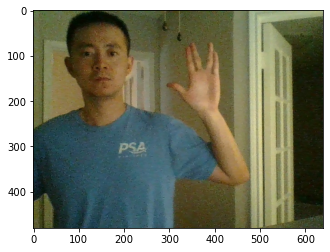

In [355]:
# CV2.imread function load a image from a path
# imread returns a numpy.ndarry (n-dimensional array)
img = cv2.imread(IMAGE_PATH)
# seems like no need to do the following step as type(img) is already numpy.ndarray
image_np = np.array(img)


# tf.convert_to_tensor convert a numpy arrays, python lists/scalars into a tensor (tensor is a generalization of vectors and matrices in higher dimension)
# dtype: element type for the returned tensor
# np.expand_dims expand the shape of an array (i.e., adding '[]' to the outside of an array)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)


# detect_fn input image and return proposal from model
# Object 'detections' is a dictionary with following keys:
# dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores',
# 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])
detections = detect_fn(input_tensor)


# get the num of detections
# also remove "num_detections" from detections dictionary
num_detections = int(detections.pop('num_detections'))


# turn value under each key as numpy array
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}


# readding the num_detections back to detections
detections['num_detections'] = num_detections


# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)


# labei_id_offset is due to python starts at 0
label_id_offset = 1
# copy the input image arary data (i.e., BGR format)
image_np_with_detections = image_np.copy()


viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            
            # classification result
            detections['detection_classes']+label_id_offset,
            
            # prob data
            detections['detection_scores'],
            
            # category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
            category_index,
            
            use_normalized_coordinates=True,
            
            # define the max number of detection output
            max_boxes_to_draw=2,
            
            # define the min threshold for detection result output
            min_score_thresh=.5,
            agnostic_mode=False)

# cv2.cvtColor(image, cv2.COLOR_BGR2RGB) simply jsut switch the order of value from Blue, Green, Red to Red, Green, Blue
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real Time Detections from Webcam

In [350]:
# hit q to exit the live cam 


# 0 as default laptop camera; if more than 1 camera, input 1 to choose 2nd camera
# this is to create a video capture object
cap = cv2.VideoCapture(0)
# cap.get(cv2.CAP_PROP_FRAME_WIDTH) get the width of the frame of the object cap
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


while cap.isOpened(): 
    # capture frame by frame
    # ret get True/False value of whether the next frame is captured or not
    # frame get the image array vector
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    # expand_dims add dimensions to array; 0 means add 1 dim to x axis: Example: expand_dims(array([2,4]),0) -> array([[2,4]])
    # then convert to tensor object from np array
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    
    ##### below regarding detections is the same as in the static image recognition part
    # detect_fn has been defined above: input image, return proposal
    detections = detect_fn(input_tensor)
    
    # remove the "num_detections" from detections dictionary and will readd back after transforming other data wihtin detections dictionary
    num_detections = int(detections.pop('num_detections'))
    # turn value under each key as np arary
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    # add back the num of detection
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    
    
    # visualize each frame with the detection result
    # basically a live camera with delayed image detection displayed 
    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=2,
                min_score_thresh=.5,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    # exit procedure; press q to exit webcam
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break